# **MEDICAL APPOINTMENT NO SHOWS**
By (Shaikha Bin Ateeq & Alanoud Alosaimi)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dd">Data Description</a></li>
<li><a href="#cp">Cleaning And Preprocessing</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#gd">Get Dummies</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

<li><a href="#ho">Handle Outliers</a></li>
<li><a href="#sd">Split The Data</a></li>
<li><a href="#rd">Resampling The Data</a></li>
<li><a href="#sd1">Scaling The Data</a></li>
<li><a href="#b">Basline model</a></li>
<li><a href="#lr">1.Logistic Regression</a></li>

<li><a href="#knn">2.K-Nearest Neighbors</a></li>
<li><a href="#dt">3.Decision Tree</a></li>
<li><a href="#et">4.Extra Trees</a></li>
<li><a href="#rf">5.Random Forest</a></li>
<li><a href="#svm">6.Support Vector Machine</a></li>
<li><a href="#nb">7.Naive Bayes (Gaussian)</a></li>

<li><a href="#nbm">8.Naive Bayes (MultinomialNB)</a></li>
<li><a href="#xg">9.XGBoost</a></li>
<li><a href="#gs">Grid Search</a></li>
<li><a href="#gs1">XGBoost (Hyper Parameter Tuning)</a></li>
<li><a href="#fff">Final Model Testing</a></li>
</ul>

<a id='intro'></a>
# **Introduction**


One of the problems that medical clinics face is when a person books an appointment but does not show up. Every appointment that is not attended deprives another patient of the opportunity to benefit from it.
In this project, we will predict whether the patient will show or not, the aim is to help clinics in Brazil know if the clinic or the patient is responsible for this problem and understand the causes that led to it.



<a id='dd'></a>
# **Data Description**


The dataset collects information on more than 100k medical appointments in Brazil and 14 features which are:

*   PatientId: Identification of a patient.

*   AppointmentID: Identification of each appointment.

*   Gender: Male or Female.

*  ScheduledDay: The day someone called or registered the appointment

* AppointmentDay: The day of the actual appointment, when they have to visit the doctor.

* Age: Indicates the age of the patient.

* Neighborhood: Indicates the place of the appointment.

* Scholarship: Indicates whether the patient is enrolled in the Brasilian welfare program.

* Hipertension: True or False

* Diabetes: True or False

* Alcoholism: True or False
* Handcap: True or False
* SMS_received: Indicate if the patients have received SMS massage before their appointment.

* No-show: Indicates ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

 **Imports**


In [ ]:
pip install imblearn

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta,date
import calendar
import imblearn.over_sampling
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

**Read Dataset**

In [ ]:
df=pd.read_csv('Dataset_Medical_Appointment.csv')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Explore The Dataset**

In [ ]:
df.shape

(110527, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
print(df['No-show'].value_counts()) # the data imbalanced 

No     88208
Yes    22319
Name: No-show, dtype: int64


In [ ]:
for i in df.columns:
    print(i+":",len(df[i].unique()))

PatientId: 62299
AppointmentID: 110527
Gender: 2
ScheduledDay: 103549
AppointmentDay: 27
Age: 104
Neighbourhood: 81
Scholarship: 2
Hipertension: 2
Diabetes: 2
Alcoholism: 2
Handcap: 5
SMS_received: 2
No-show: 2


In [ ]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

<a id='cp'></a>
# **Cleaning And Preprocessing**

In [ ]:
df.isnull().sum() 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# replace NO to 0 & YES to 1:the number easy to handle more than string also for gender
df["No-show"].replace({"No":0, "Yes":1}, inplace=True)
df['PatientId'].astype('int64')

0          29872499824296
1         558997776694438
2           4262962299951
3            867951213174
4           8841186448183
               ...       
110522      2572134369293
110523      3596266328735
110524     15576631729893
110525     92134931435557
110526    377511518121127
Name: PatientId, Length: 110527, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


<a id='fe'></a>
# **Feature Engineering**

**Feature 1:Count how many time the patient was scheduled for an appointments**

In [ ]:
df['NumberOfSchedulation'] = df.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()

**Feature 2: Count a patient probability if he makes a previous no show in his appointment by (count the cumsum of no show divied by the cumsum of  NumberOfSchedulation)**

In [ ]:
df['NumberOfNoShow'] = (df[df['NumberOfSchedulation'] > 0].sort_values(
    ['PatientId', 'ScheduledDay']).groupby(['PatientId'])['No-show'].cumsum() / df[df['NumberOfSchedulation'] > 0]['NumberOfSchedulation'])
df['NumberOfNoShow'] = df['NumberOfNoShow'].fillna(0)

**Feature 3: How many time the Patient set for Scheduled for  Appointment but it missed the  Appointment**

In [ ]:
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())

**Feature 4: Convert the Date into datetime object and find the difference between the Scheduled Day and the Appointment Day**

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DayDifference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

**Feature 5: Collect Number of diseases for each patient**

In [ ]:
x=[]
for i in range(0,len(df)):
  d1=df.Hipertension[i].sum()
  d2=df.Diabetes[i].sum()
  d3=df.Alcoholism[i].sum()
  x.append(d1+d2+d3)

df['Diseases']=x


**Feature 6: Collect Avg of diseases for each patient**

In [ ]:
y=[]
for i in range(0,len(df)):
  d1=df.Hipertension[i].sum()
  d2=df.Diabetes[i].sum()
  d3=df.Alcoholism[i].sum()
  y.append((d1+d2+d3)/3)


df['Avg_Diseases']=y

**Feature 7: Gender probability (Female, Male) Multple by number of diseases (The number of diseases per sex)**

In [ ]:
female=df.Gender[df['Gender']== 'F'].value_counts()/len(df.Gender)
male=df.Gender[df['Gender']== 'M'].value_counts()/len(df.Gender)

xx=[]
for i in range(0,len(df)):
  if df.Gender[i]==1:
   y1=float(female)*df['Diseases'][i]
   xx.append(y1)
  else:
    y2=float(male)*df['Diseases'][i]
    xx.append(y2)
df['GenderRtiePerDiseases']=xx

**Feature 8: Collect Scheduleed Day, Month**

In [ ]:
df['ScheduleedDay'] = pd.to_datetime(df['ScheduledDay']).dt.day
df['ScheduledMonth'] = pd.to_datetime(df['ScheduledDay']).dt.month

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,NumberOfSchedulation,NumberOfNoShow,Num_App_Missed,DayDifference,Diseases,Avg_Diseases,GenderRtiePerDiseases,ScheduleedDay,ScheduledMonth
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0.0,0,0,1,0.333333,0.350023,29,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,0.0,0,0,0,0.000000,0.000000,29,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0.0,0,0,0,0.000000,0.000000,29,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0.0,0,0,0,0.000000,0.000000,29,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,0.0,0,0,2,0.666667,0.700046,29,4


<a id='gd'></a>
# **Get Dummies**

In [ ]:
df['Handcap'] = pd.Categorical(df['Handcap'])
df=pd.get_dummies(df,columns=['Gender','Handcap'])

**Finally drop unnessery Coulmans**

In [ ]:
df.drop(['PatientId','ScheduledDay','AppointmentDay','AppointmentID','Neighbourhood', 'Diseases', 'GenderRtiePerDiseases'], axis=1,inplace = True)


In [ ]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,NumberOfSchedulation,NumberOfNoShow,Num_App_Missed,DayDifference,Avg_Diseases,ScheduleedDay,ScheduledMonth,Gender_F,Gender_M,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,62,0,1,0,0,0,0,1,0.0,0,0,0.333333,29,4,1,0,1,0,0,0,0
1,56,0,0,0,0,0,0,1,0.0,0,0,0.000000,29,4,0,1,1,0,0,0,0
2,62,0,0,0,0,0,0,1,0.0,0,0,0.000000,29,4,1,0,1,0,0,0,0
3,8,0,0,0,0,0,0,1,0.0,0,0,0.000000,29,4,1,0,1,0,0,0,0
4,56,0,1,1,0,0,0,0,0.0,0,0,0.666667,29,4,1,0,1,0,0,0,0


<a id='eda'></a>
# **Exploratory Data Analysis**

In [ ]:
df.columns 

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'SMS_received', 'No-show', 'NumberOfSchedulation', 'NumberOfNoShow',
       'Num_App_Missed', 'DayDifference', 'Avg_Diseases', 'ScheduleedDay',
       'ScheduledMonth', 'Gender_F', 'Gender_M', 'Handcap_0', 'Handcap_1',
       'Handcap_2', 'Handcap_3', 'Handcap_4'],
      dtype='object')

In [ ]:
df2 = df[['NumberOfNoShow', 'Num_App_Missed', 'DayDifference','No-show']]
df2

,NumberOfNoShow,Num_App_Missed,DayDifference,No-show
0,0.0,0,0,0
1,0.0,0,0,0
2,0.0,0,0,0
3,0.0,0,0,0
4,0.0,0,0,0
...,...,...,...,...
110522,0.0,1,35,0
110523,0.0,1,35,0
110524,0.0,0,41,0
110525,0.0,0,41,0


Text(0.5, 1.0, 'Correlations Between Features')

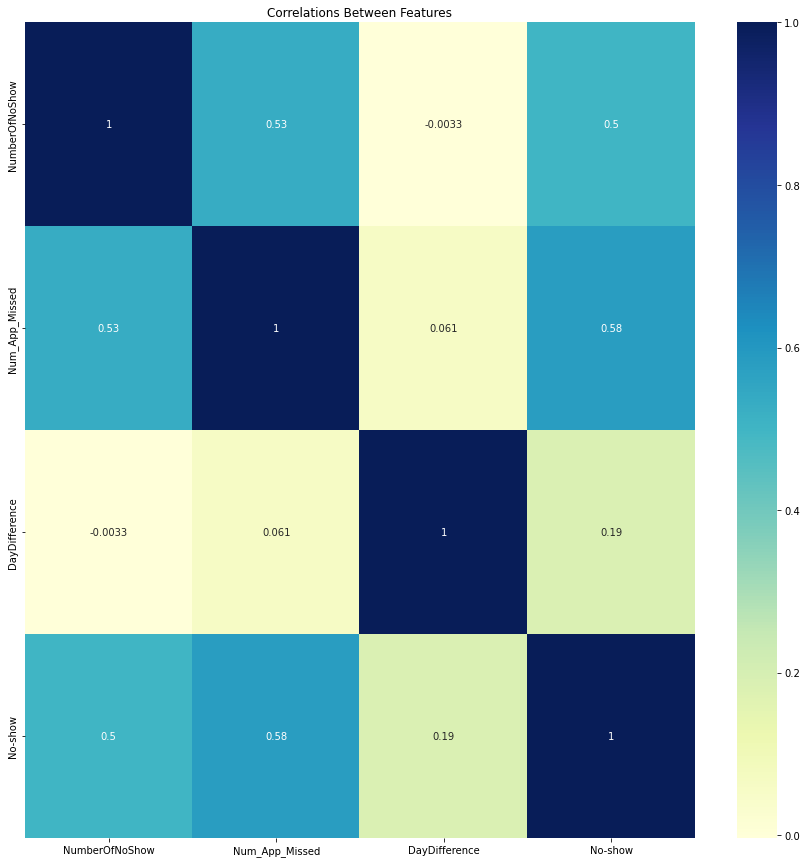

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr() ,annot=True,cmap="YlGnBu")
plt.title("Correlations Between Features")

From the above figure we can see that the No-Show factor  have a significant positive impact on our predictions.

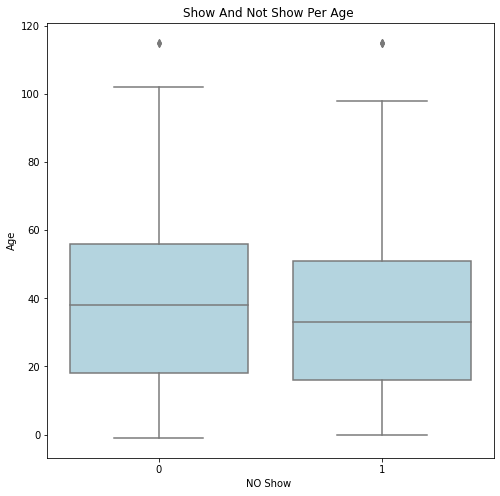

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='No-show',y='Age',data=df,color='lightblue')
plt.title("Show And Not Show Per Age ")
plt.xlabel('NO Show ');
plt.ylabel('Age');

any age more than 100 is considered as an Outlier

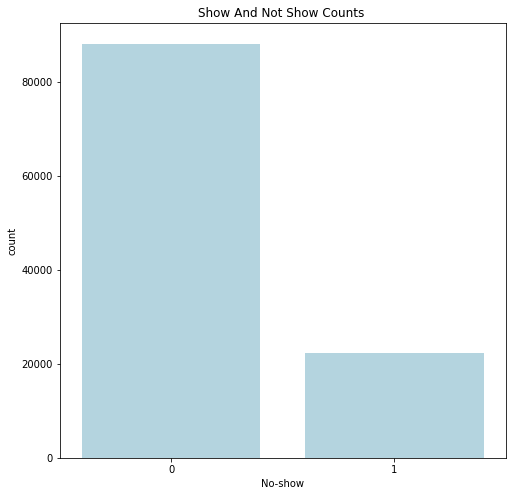

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Show And Not Show Counts ")
sns.countplot(data = df, x = 'No-show', color = 'lightblue');

From the above figure, it is clear to us that the data is unbalanced, so a resampling  must be done for it


<a id='ho'></a>

## **Handle Outliers**

In [ ]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(df.Age)

In [ ]:
df[(df.Age < lowerbound) | (df.Age > upperbound)]

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,NumberOfSchedulation,NumberOfNoShow,Num_App_Missed,DayDifference,Avg_Diseases,ScheduleedDay,ScheduledMonth,Gender_F,Gender_M,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4
63912,115,0,0,0,0,0,1,1,1.000000,1,3,0.000000,16,5,1,0,0,1,0,0,0
63915,115,0,0,0,0,0,1,2,1.000000,2,3,0.000000,16,5,1,0,0,1,0,0,0
68127,115,0,0,0,0,0,1,0,0.000000,3,38,0.000000,8,4,1,0,0,1,0,0,0
76284,115,0,0,0,0,0,0,3,0.666667,3,0,0.000000,30,5,1,0,0,1,0,0,0
97666,115,0,1,0,0,1,0,0,0.000000,0,15,0.333333,19,5,1,0,1,0,0,0,0


In [ ]:
df.drop(df[ (df.Age > upperbound) | (df.Age < lowerbound) ].index , inplace=True)

In [ ]:
df.shape

(110522, 21)

<a id='sd'></a>
# **Split The Data**

In [ ]:
X_base = df[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']]
y_base = df['No-show']

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_base, y_base, test_size=.05, random_state=3)
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(
    X_train_base, y_train_base, test_size=.05, random_state=3)

In [ ]:
X = df.drop(['No-show'], axis=1)
y = df['No-show']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.05, random_state=3)

<a id='rd'></a>
# **Resampling The Data**

In [ ]:
y_train.value_counts()

0    79554
1    20191
Name: No-show, dtype: int64

In [ ]:
n_pos = np.sum(y_train == 0)
n_neg = np.sum(y_train == 1)
ratio = {0 : n_pos, 1 : n_neg * 4} 

ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state = 42)     
X_train, y_train = ROS.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (80764) in class 1 will be larger than the number of samples in the majority class (class #0 -> 79554)
  f"After over-sampling, the number of samples ({n_samples})"


In [ ]:
y_train.value_counts() 

1    80764
0    79554
Name: No-show, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


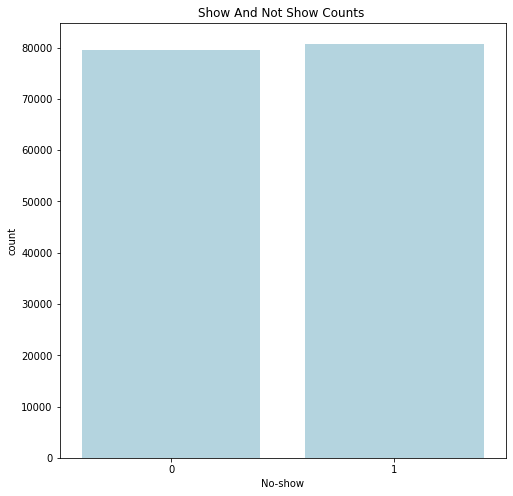

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Show And Not Show Counts ")
sns.countplot(y_train,color = 'lightblue');

From the above figure, it is clear to us that the data now balanced

<a id='sd1'></a>
# **Scaling The Data**

In [ ]:
ss=StandardScaler()
scaled_x_train=ss.fit_transform(X_train)
scaled_x_val=ss.transform(X_val)

<a id='b'></a>
# **Basline model**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_base, y_train_base)

LogisticRegression()

In [ ]:
print('Train Score:',lr.score(X_train_base, y_train_base))
print('Validtions Score:',lr.score(X_val_base, y_val_base))
y_pred = lr.predict(X_val_base)
clf_report = classification_report(y_val_base, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.7975738132237205
Validtions Score: 0.8026666666666666

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4214
           1       0.00      0.00      0.00      1036

    accuracy                           0.80      5250
   macro avg       0.40      0.50      0.45      5250
weighted avg       0.64      0.80      0.71      5250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id='lg'></a>

# **1. Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(scaled_x_train, y_train)

LogisticRegression()

In [ ]:
print('Train Score:',lr.score(scaled_x_train , y_train))
print('Validtions Score:',lr.score(scaled_x_val, y_val))
y_pred = lr.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.943686922242044
Validtions Score: 0.9175238095238095

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4214
           1       0.71      0.98      0.82      1036

    accuracy                           0.92      5250
   macro avg       0.85      0.94      0.89      5250
weighted avg       0.94      0.92      0.92      5250



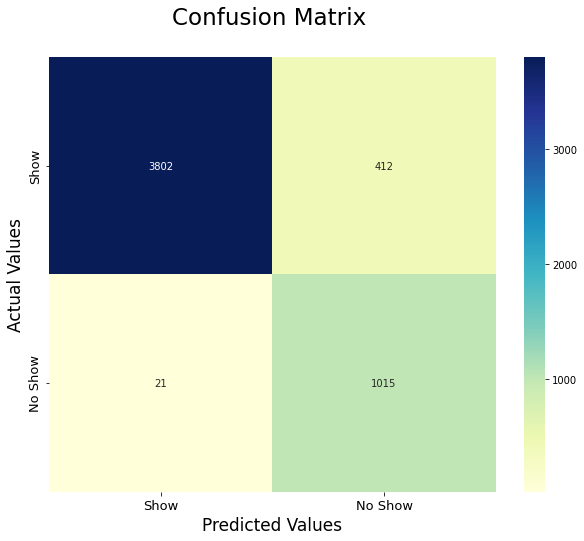

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='knn'></a>

# **2. K-Nearest Neighbors**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Train Score:',knn.score(scaled_x_train , y_train))
print('Validtions Score:',knn.score(scaled_x_val, y_val))
y_pred = knn.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9704774261155953
Validtions Score: 0.9331428571428572

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4214
           1       0.76      0.96      0.85      1036

    accuracy                           0.93      5250
   macro avg       0.88      0.94      0.90      5250
weighted avg       0.94      0.93      0.94      5250



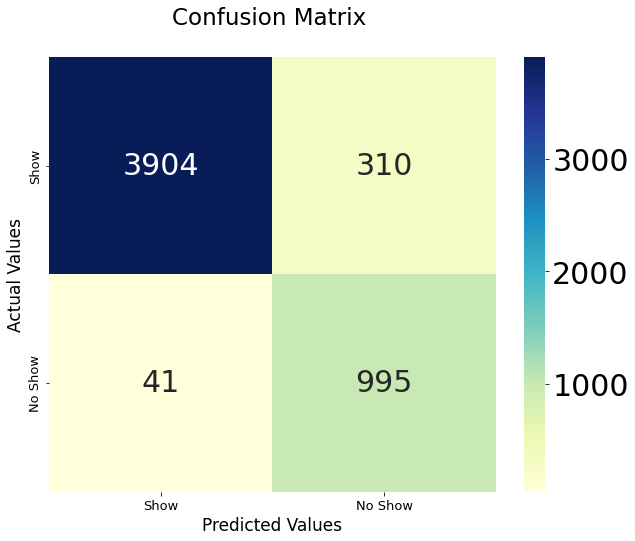

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='dt'></a>

# **3. Decision Tree**

In [ ]:
dectree = DecisionTreeClassifier()
dectree.fit(scaled_x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Train Score:',dectree.score(scaled_x_train , y_train))
print('Validtions Score:',dectree.score(scaled_x_val, y_val))
y_pred = dectree.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9992702004765529
Validtions Score: 0.948

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4214
           1       0.86      0.88      0.87      1036

    accuracy                           0.95      5250
   macro avg       0.91      0.92      0.92      5250
weighted avg       0.95      0.95      0.95      5250



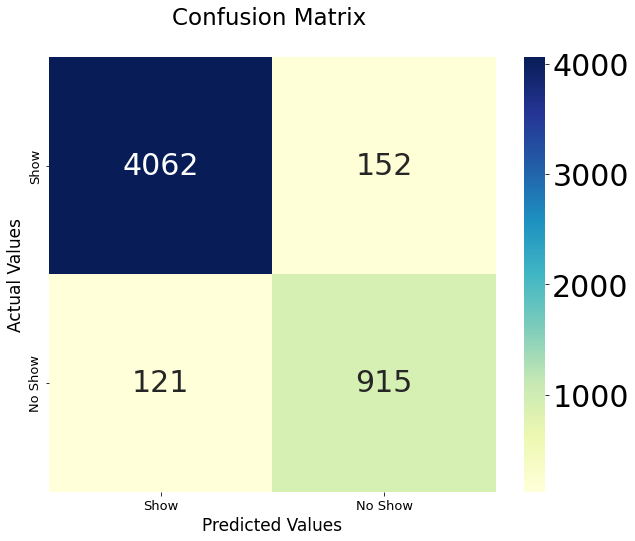

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');


<a id='et'></a>
# **4. Extra Trees**

In [ ]:
extratrees = ExtraTreesClassifier()
extratrees.fit(scaled_x_train, y_train)

ExtraTreesClassifier()

In [ ]:
print('Train Score:',extratrees.score(scaled_x_train , y_train))
print('Validtions Score:',extratrees.score(scaled_x_val, y_val))
y_pred = extratrees.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9992702004765529
Validtions Score: 0.9554285714285714

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4214
           1       0.87      0.90      0.89      1036

    accuracy                           0.96      5250
   macro avg       0.93      0.94      0.93      5250
weighted avg       0.96      0.96      0.96      5250



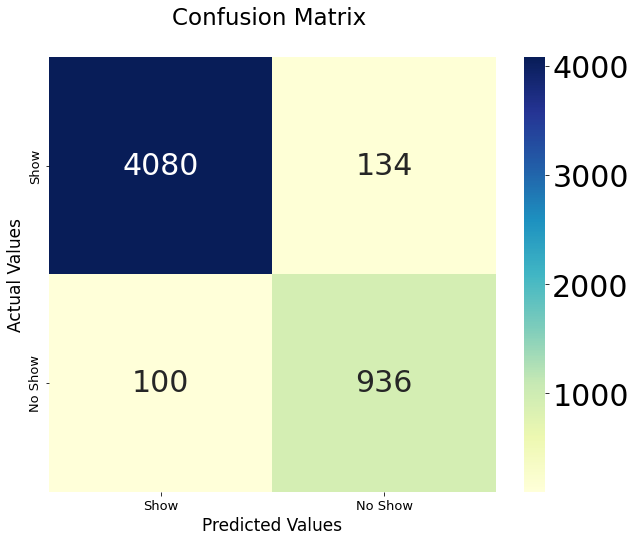

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='rf'></a>
# **5. Random Forest**

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [ ]:
print('Train Score:',randomforest.score(scaled_x_train , y_train))
print('Validtions Score:',randomforest.score(scaled_x_val, y_val))
y_pred = randomforest.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9992702004765529
Validtions Score: 0.959047619047619

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4214
           1       0.86      0.95      0.90      1036

    accuracy                           0.96      5250
   macro avg       0.92      0.96      0.94      5250
weighted avg       0.96      0.96      0.96      5250



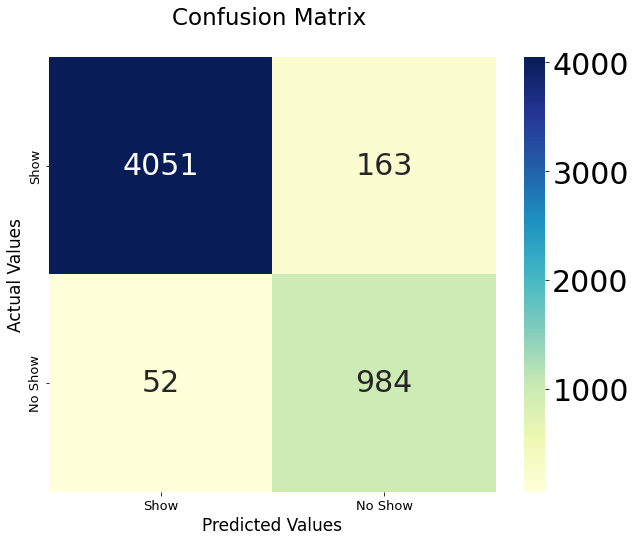

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='svm'></a>

# **6. Support Vector Machine**

In [ ]:
svm = SVC()
svm.fit(scaled_x_train, y_train)

SVC()

In [ ]:
print('Train Score:',svm.score(scaled_x_train , y_train))
print('Validtions Score:',svm.score(scaled_x_val, y_val))
y_pred = svm.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9633727965668234
Validtions Score: 0.9457142857142857

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4214
           1       0.79      0.98      0.88      1036

    accuracy                           0.95      5250
   macro avg       0.89      0.96      0.92      5250
weighted avg       0.96      0.95      0.95      5250



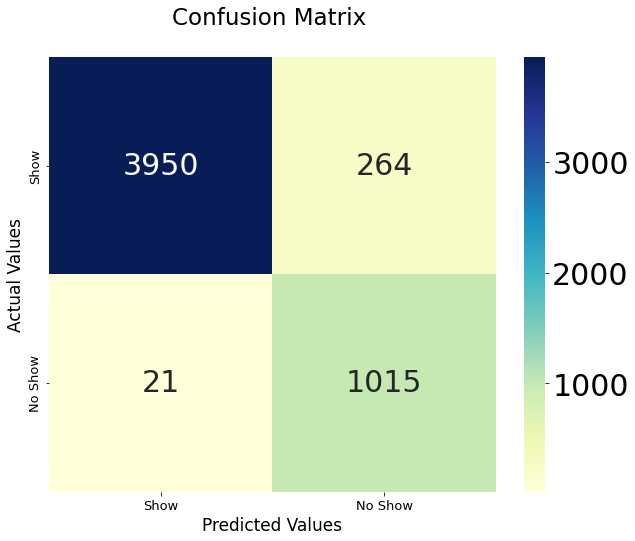

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='nb'></a>

# **7. Naive Bayes (Gaussian)**

In [ ]:
gnb = GaussianNB()
gnb.fit(scaled_x_train, y_train)

GaussianNB()

In [ ]:
print('Train Score:',gnb.score(scaled_x_train , y_train))
print('Validtions Score:',gnb.score(scaled_x_val, y_val))
y_pred = gnb.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.8083621302660962
Validtions Score: 0.8638095238095238

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      4214
           1       0.63      0.73      0.68      1036

    accuracy                           0.86      5250
   macro avg       0.78      0.81      0.80      5250
weighted avg       0.87      0.86      0.87      5250



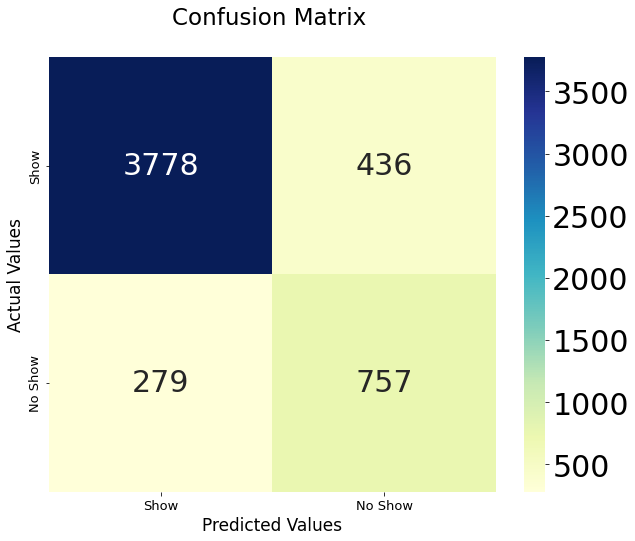

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='nbm'></a>

# **8. Naive Bayes (MultinomialNB)**

In [ ]:
bnb = BernoulliNB()
bnb.fit(scaled_x_train, y_train)

BernoulliNB()

In [ ]:
print('Train Score:',bnb.score(scaled_x_train , y_train))
print('Validtions Score:',bnb.score(scaled_x_val, y_val))
y_pred = bnb.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9331453735700296
Validtions Score: 0.8929523809523809

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4214
           1       0.65      0.99      0.78      1036

    accuracy                           0.89      5250
   macro avg       0.82      0.93      0.86      5250
weighted avg       0.93      0.89      0.90      5250



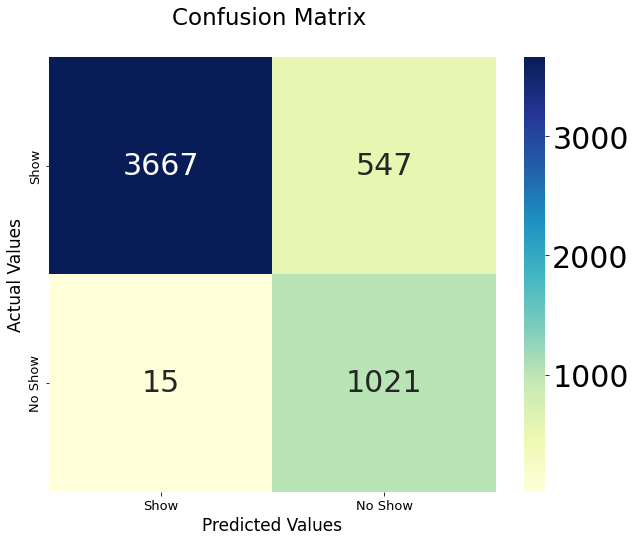

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='xg'></a>

# **9. XGBoost**

In [ ]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', 
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(scaled_x_train,y_train),(scaled_x_val,y_val)]
fit_model = gbm.fit( 
                    scaled_x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', 
                    early_stopping_rounds=50,
                    verbose=False
                   )

In [ ]:
print('Train Score:',fit_model.score(scaled_x_train , y_train))
print('Validtions Score:',fit_model.score(scaled_x_val, y_val))
y_pred = fit_model.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9691488167267556
Validtions Score: 0.9499047619047619

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4214
           1       0.80      0.99      0.89      1036

    accuracy                           0.95      5250
   macro avg       0.90      0.97      0.93      5250
weighted avg       0.96      0.95      0.95      5250



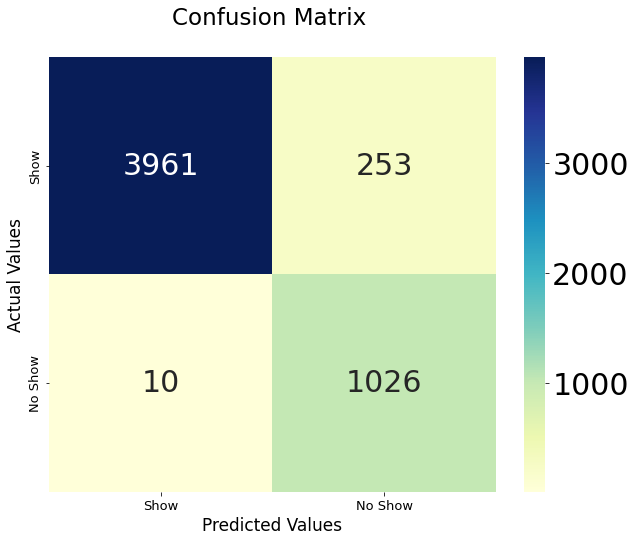

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='gs'></a>

# **Grid Search**

In [ ]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic'
)


parameters = {
    'max_depth': [5, 15, 25],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}


grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = -1,
    verbose=1
)


grid_search.fit(scaled_x_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params:  {'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 500}
Best estimator:  XGBClassifier(max_depth=25, n_estimators=500)
Best score:  0.9819670949558326


<a id='gs1'></a>

**XGBoost (Hyper Parameter Tuning)**

In [ ]:
tuning = xgb.XGBClassifier(
                          objective='binary:logistic', 
                          max_depth=25, 
                          n_estimators=500,
                           learning_rate=0.1
                       )

tuning.fit(scaled_x_train, y_train)

XGBClassifier(max_depth=25, n_estimators=500)

In [ ]:
print('Train Score:',tuning.score(scaled_x_train , y_train))
print('Validtions Score:',tuning.score(scaled_x_val, y_val))
y_pred = tuning.predict(scaled_x_val)
clf_report = classification_report(y_val, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.9992514876682593
Validtions Score: 0.96

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4214
           1       0.87      0.94      0.90      1036

    accuracy                           0.96      5250
   macro avg       0.93      0.95      0.94      5250
weighted avg       0.96      0.96      0.96      5250



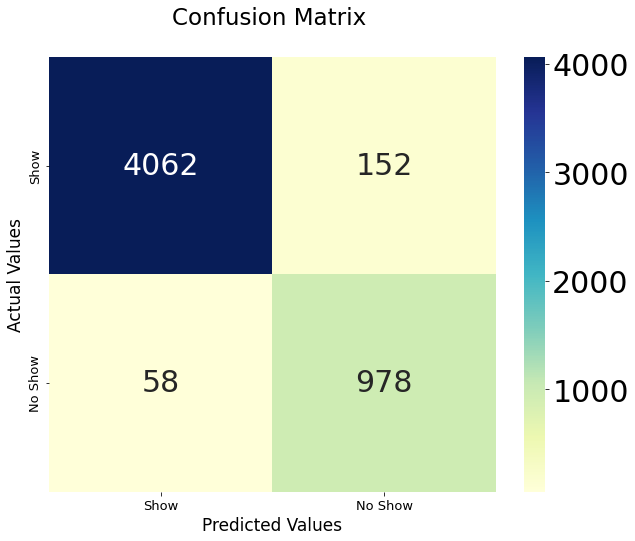

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

<a id='fff'></a>


# **Final Model Testing**

In [ ]:
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [ ]:
finalmodel = xgb.XGBClassifier(
                          objective='binary:logistic', 
                          max_depth=25, 
                          n_estimators=500,
                           learning_rate=0.1
                       )
                       
finalmodel.fit(X_train_val, y_train_val)

XGBClassifier(max_depth=25, n_estimators=500)

In [ ]:
print('Train Score:',finalmodel.score(X_train_val , y_train_val))
print('Test Score:',finalmodel.score(X_test, y_test))
y_pred = finalmodel.predict(X_test)
clf_report = classification_report(y_test, y_pred)
print(f"\nClassification Report: \n{clf_report}")

Train Score: 0.999214824120603
Test Score: 0.9668898136421205

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4438
           1       0.90      0.93      0.92      1089

    accuracy                           0.97      5527
   macro avg       0.94      0.95      0.95      5527
weighted avg       0.97      0.97      0.97      5527



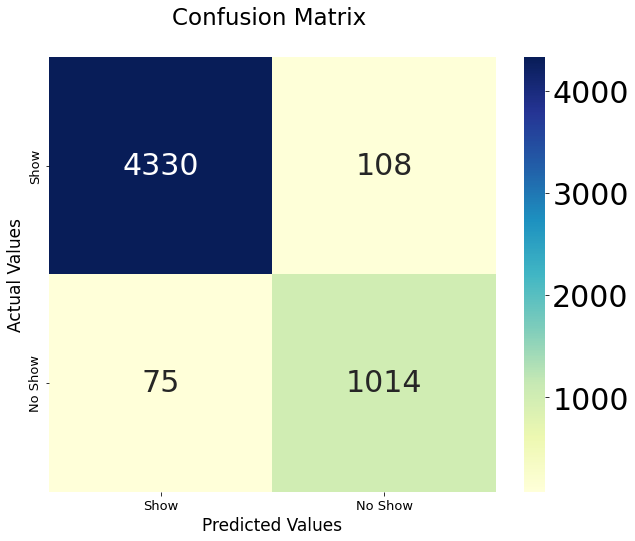

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23); 
ax.xaxis.set_ticklabels(['Show', 'No Show'],fontsize=13, color='Black');
ax.yaxis.set_ticklabels(['Show', 'No Show'],fontsize=13,color='Black');

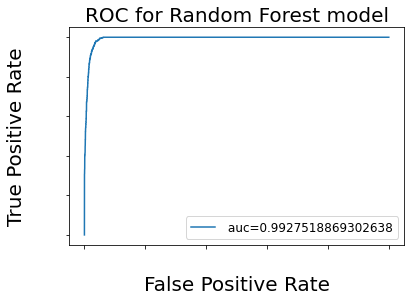

In [ ]:
y_pred_proba = finalmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xticks(color='White')
plt.yticks(color='White')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.rcParams.update({'font.size': 12});
plt.title('ROC for Random Forest model', fontsize=20)    
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show();